# **IMPORT**

In [1]:
#Importing Dataset from the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing libraries

from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

In [3]:
#image = r"/content/drive/MyDrive/archive (3)/Dataset/01AX-WSMR"
#image = r"/content/drive/MyDrive/archive (3)/Dataset/th (3)"
image = r"/content/drive/MyDrive/archive (3)/Dataset/img2"
ext = ".jpg"

In [4]:
import time
start_time=time.time()
print(start_time)

1668573078.250286


# **ORIGINAL IMAGE**

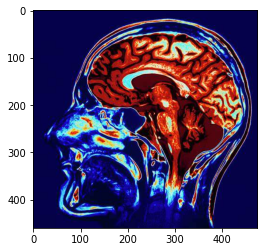

<class 'numpy.ndarray'>
(460, 474, 3)
654120
[[[  5   1  75]
  [  5   1  75]
  [  5   1  75]
  ...
  [  5   1  75]
  [  5   1  75]
  [  5   1  75]]

 [[  5   1  75]
  [  5   1  75]
  [  5   1  75]
  ...
  [  5   1  75]
  [  5   1  75]
  [  5   1  75]]

 [[  5   1  75]
  [  5   1  75]
  [  5   1  75]
  ...
  [  5   1  75]
  [  5   1  75]
  [  5   1  75]]

 ...

 [[ 22  20  85]
  [  0   0  64]
  [  9   7  73]
  ...
  [  5   2  71]
  [  0   0  62]
  [ 21  19  85]]

 [[ 45  43 106]
  [ 11   9  72]
  [  8   6  71]
  ...
  [  5   2  71]
  [ 12  10  76]
  [ 47  45 110]]

 [[ 58  57 117]
  [ 15  14  74]
  [  5   3  66]
  ...
  [  5   2  71]
  [  6   4  70]
  [ 50  48 113]]]


In [5]:
#Reading and displaying image

img = mpimg.imread(image + ext)
imgplot = plt.imshow(img)
plt.show()
print(type(img))#Image format 
print(img.shape)
print(img.size)#Size of image i.e., height*width*3
print(img) #It will show image in 2d array format

In [6]:
#converting nD array to 1D array

OneD_img=img.ravel()
print(OneD_img)

[  5   1  75 ...  50  48 113]


In [7]:
#Splitting array into 2 parts 
two_split = np.array_split(img, 2)
img1=two_split[0]
img2=two_split[1]
split=np.split(OneD_img,2)
i1=split[0]#split 1 array
i2=split[1]#split 2 array
print(i1)
print(i2)

[ 5  1 75 ...  5  1 75]
[  5   2  71 ...  50  48 113]


## **Displaying Splitted images**

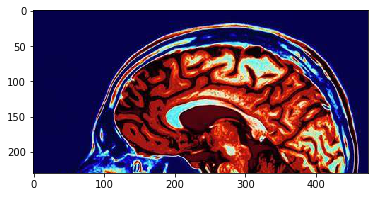

In [8]:
#displaying 1st splitted part of original image by converting 1d array to image 
h,w,c=img1.shape
t=(h,w,c)
co=0
A=np.zeros(t,dtype=np.uint8)
for i in range(h):
    for j in range(w):
        A[i,j]=[i1[co],i1[co+1],i1[co+2]]
        co+=3
i=Image.fromarray(A,"RGB")
plt.imshow(i, interpolation='nearest')
plt.show()

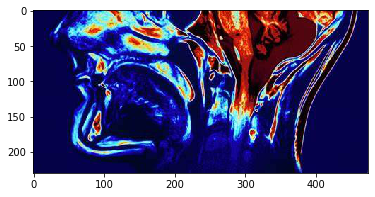

In [9]:
#displaying 2nd splitted part of original image by converting 1d array to image 
h,w,c=img2.shape
t=(h,w,c)
co=0
A=np.zeros(t,dtype=np.uint8)
for i in range(h):
    for j in range(w):
        A[i,j]=[i2[co],i2[co+1],i2[co+2]]
        co+=3
i=Image.fromarray(A,"RGB")
plt.imshow(i, interpolation='nearest')
plt.show()

# **GENERATING CHAOTIC KEY SEQUENCE**

In [10]:
"""chaiotic map sequence 1
yn+1 = yn − r ∗ tanh xn
xn+1 = sin xn + cos yn"""
# key Sequence1
def genkey1(xs,ys,r,size):
  key=[]
  key1=[]
  
  for i in range(size):
    xs=(ys-r*math.tanh(xs))
    ys=math.sin(xs)+math.cos(ys)
    key.append(int((xs*pow(10,12)))%256)
    key1.append(int((ys*pow(10,12)))%256)
    
  k1 = np.array (key) #key1-1
  k2 = np.array (key1) #key1-2

  return k1,k2
genkey1(0.1,0.1,3.0,img1.size)


(array([254, 141, 132, ..., 232, 223, 232]),
 array([197, 173,  81, ...,   3, 150,   3]))

In [11]:
"""chaiotic map sequence 2
yn+1 = b ∗ xn2
xn+1 = xn + yn2 − a ∗ r"""

# key Sequence2
def genkey2(xs,ys,r,a,b,size):
  xkey=[]
  ykey=[]
  for i in range(size):
    ys=b*pow(xs,2)
    xs=(xs+(pow(ys,2)-a)*r)
    xkey.append(int((xs*pow(10,12)))%256)
    ykey.append(int((ys*pow(10,12)))%256)
  k1 = np.array (xkey) #key2-1
  k2 = np.array (ykey) #key2-2

  return k1,k2
genkey2(0.1,0.1,2.35,0.5,0.3,img.size)

(array([ 49, 101, 255, ...,  82, 239, 252]),
 array([  0,  80,  34, ...,  32, 116, 246]))

# **ENCRYPTION PROCESS**

### **1st XOR of key sequence and splits**

In [12]:
#XOR between splits and keys
kk1=genkey1(0.1,0.1,17.0,img1.size)
kk2=genkey2(0.1,0.1,2.35,0.5,0.3,img1.size)

key1=kk1[0] #key1-1
key2=kk2[0] #key2-1

#xor between key sequence 1 of 1 and split1
res1 = np.array(i1.size)# after 1st xor split1
res1=key1^i1

#xor between key sequence 1 of 2 and split2
res2 = np.array(i2.size) # after 1st xor split2
res2=key2^i2

print(res1)
print(res2)

[245 122 164 ... 162  11 236]
[ 52 103 184 ...  30  38  86]


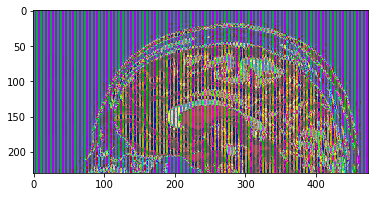

In [13]:
#displaying image after XOR of 1st split -- 1st time
h,w,c=img1.shape
t=(h,w,c)
co=0
A=np.zeros(t,dtype=np.uint8)
for i in range(h):
    for j in range(w):
        A[i,j]=[res1[co],res1[co+1],res1[co+2]]
        co+=3
i=Image.fromarray(A)
plt.imshow(i, interpolation='none')
plt.show()

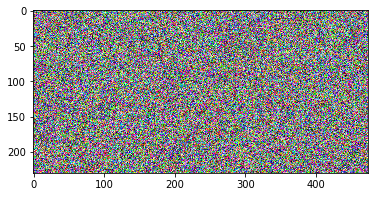

In [14]:
#displaying image after XOR of 2nd split -- 1st time
h,w,c=img2.shape
t=(h,w,c)
co=0
A=np.zeros(t,dtype=np.uint8)
for i in range(h):
    for j in range(w):
        A[i,j]=[res2[co],res2[co+1],res2[co+2]]
        co+=3
i=Image.fromarray(A)
plt.imshow(i, interpolation='none')
plt.show()

## **Permutation 1 (initial)**

In [15]:
#Permutation
print(res1)
print(res2)

#Permutation of 1st half
p11=np.zeros(len(res1),dtype=int)
for i in range(len(res1)):
  p11[i]=res1[key1[i]] #After 1st permutation 1st split
print(p11)

#Permutation of 2nd half
p12=np.zeros(len(res2),dtype=int)
for i in range(len(res2)):
  p12[i]=res2[key2[i]] #After 1st permutation 2nd split
print(p12)


#Inverse permutation of 1st half

for i in range(len(res1)):
  res1[key1[i]]=p11[i]
print(res1)

#Inverse permutation of 2nd half

for i in range(len(res2)):
  res2[key2[i]]=p12[i]
print(res2)

[245 122 164 ... 162  11 236]
[ 52 103 184 ...  30  38  86]
[ 15 162 236 ... 236 235 236]
[ 95   7  43 ... 149  72  18]
[245 122 164 ... 162  11 236]
[ 52 103 184 ...  30  38  86]


## **2nd xor of key sequence and swapped splits**

In [16]:
#XOR between splitted images
kk1=genkey1(0.1,0.1,17.0,img2.size)
kk2=genkey2(0.1,0.1,2.35,0.5,0.3,img2.size)
key1=kk1[1] #key1-2
key2=kk2[1] #key2-2


#xor between key sequence 2 of 1 and split1
resss1 = np.array(i1.size)
resss1=(key2^p11)

#xor between key sequence 2 of 2 and split2
resss2 = np.array(i2.size)
resss2=(key1^p12)

print(resss1)
print(resss2)

[ 15 242 206 ...  42 184  13]
[ 65 234 231 ... 159 239  24]


## **Re Permutation**

### Re-permutation 1

In [17]:
#Permutation
print(resss1)
print(resss2)

#Permutation of 1st half
p11=np.zeros(len(res1),dtype=int)
for i in range(len(resss1)):
  p11[i]=resss1[key1[i]] #After 1st permutation 1st split
print(p11)

#Permutation of 2nd half
p12=np.zeros(len(res2),dtype=int)
for i in range(len(resss2)):
  p12[i]=resss2[key2[i]] #After 1st permutation 2nd split
print(p12)




[ 15 242 206 ...  42 184  13]
[ 65 234 231 ... 159 239  24]
[136 181  17 ... 120 150 120]
[ 65 245 115 ... 120 221 211]


### Re-permutation 2

In [18]:
#Permutation
print(p11)
print(p12)

#Permutation of 1st half
p21=np.zeros(len(res1),dtype=int)
for i in range(len(resss1)):
  p21[i]=p11[key1[i]] #After 1st permutation 1st split
print(p21)

#Permutation of 2nd half
p22=np.zeros(len(res2),dtype=int)
for i in range(len(resss2)):
  p22[i]=p12[key2[i]] #After 1st permutation 2nd split
print(p22)



[136 181  17 ... 120 150 120]
[ 65 245 115 ... 120 221 211]
[150 120 150 ... 255 120 255]
[ 65 123 234 ... 231 208 219]


### Re-permutation 3

In [19]:
#Permutation
print(p21)
print(p22)

#Permutation of 1st half
p31=np.zeros(len(res1),dtype=int)
for i in range(len(resss1)):
  p31[i]=p21[key1[i]] #After 1st permutation 1st split
print(p31)

#Permutation of 2nd half
p32=np.zeros(len(res2),dtype=int)
for i in range(len(resss2)):
  p32[i]=p22[key2[i]] #After 1st permutation 2nd split
print(p32)



[150 120 150 ... 255 120 255]
[ 65 123 234 ... 231 208 219]
[120 255 120 ... 133 255 133]
[ 65 210  64 ...  49 250 122]


In [20]:
#Combining 2 parts into single array

x=np.concatenate([p31,p32])
i111=x
print(x)

[120 255 120 ...  49 250 122]


## Encrypted image 

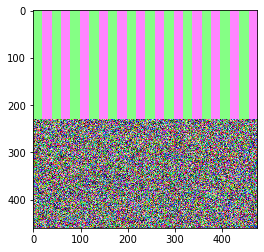

In [21]:
#displaying combined image by converting 1d array to image 
h,w,c=img.shape
t=(h,w,c)
co=0
A=np.zeros(t,dtype=np.uint8)
for i in range(h):
    for j in range(w):
        A[i,j]=[x[co],x[co+1],x[co+2]]
        co+=3
i=Image.fromarray(A)
plt.imshow(i, interpolation='none')
plt.show()

# **DECRYPTION PROCESS**

In [22]:
#Converting Encrypted image to 1d array

Dec_img=A.ravel()
print(Dec_img)

[120 255 120 ...  49 250 122]


In [23]:
#Splitting 1d array to 2 parts

two_split = np.array_split(A, 2)
imgg1=two_split[0]
imgg2=two_split[1]
split=np.split(Dec_img,2)
s1=split[0]
s2=split[1]
print(s1)
print(s2)

[120 255 120 ... 133 255 133]
[ 65 210  64 ...  49 250 122]


###**Inverse permutation-3 times**

In [24]:
#Inverse Permutation-3

# 1st half
for i in range(len(res1)):
  resss1[key1[i]]=p31[i]

#2nd half
for i in range(len(res2)):
  resss2[key2[i]]=p32[i]


#Inverse Permutation-2

#1st half
for i in range(len(res1)):
  resss1[key1[i]]=p21[i]

#2nd half
for i in range(len(res2)):
  resss2[key2[i]]=p22[i]

#Inverse Permutation-1

# 1st half
for i in range(len(res1)):
  resss1[key1[i]]=p11[i]

#2nd half
for i in range(len(res2)):
  resss2[key2[i]]=p12[i]


print(resss1)
print(resss2)

[ 15 242 206 ...  42 184  13]
[ 65 234 231 ... 159 239  24]


### **2nd xor of key sequence and splits**

In [25]:
#XOR between splitted images-- 1st time
kk1=genkey1(0.1,0.1,17.0,img1.size)
kk2=genkey2(0.1,0.1,2.35,0.5,0.3,imgg2.size)
key1=kk1[1]
key2=kk2[1]


Dresss1 = np.array(s2.size)
Dresss1=(key1^resss2)

Dresss2 = np.array(s1.size)
Dresss2=(key2^resss1)

print(Dresss1)
print(Dresss2)

[ 95   7  43 ... 149  72  18]
[ 15 162 236 ... 236 235 236]


### **Inverse permutation 1**

In [26]:

#Re permutation of 1st half

for i in range(len(resss1)):
  resss1[key1[i]]=Dresss1[i]
print(resss1)

#Re permutation of 2nd half

for i in range(len(resss2)):
  resss2[key2[i]]=Dresss2[i]
print(resss2)

[ 15 242 206 ...  42 184  13]
[236 235 236 ... 159 239  24]


### **1st xor of key sequence and splits**

In [27]:
#XOR between splitted images --2nd time
kk1=genkey1(0.1,0.1,17.0,img1.size)
kk2=genkey2(0.1,0.1,2.35,0.5,0.3,imgg2.size)

key1=kk1[0]
key2=kk2[0]
#print(s1.size)
#print(key1.size)

Fresss1 = np.array(i1.size)
Fresss1=(key1^res1)
#resss1.sort()
Fresss2 = np.array(i2.size)
Fresss2=(key2^res2)
#resss2.sort()
print(Fresss1)
print(Fresss2)

[ 5  1 75 ...  5  1 75]
[  5   2  71 ...  50  48 113]


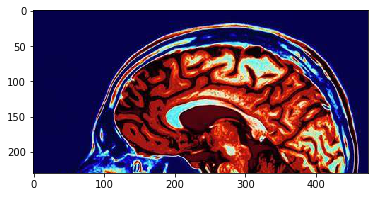

In [28]:
#displaying image after XOR of 2nd split -- 1st time
h,w,c=img2.shape
t=(h,w,c)
co=0
A=np.zeros(t,dtype=np.uint8)
for i in range(h):
    for j in range(w):
        A[i,j]=[Fresss1[co],Fresss1[co+1],Fresss1[co+2]]
        co+=3
i=Image.fromarray(A)
plt.imshow(i, interpolation='none')
plt.show()

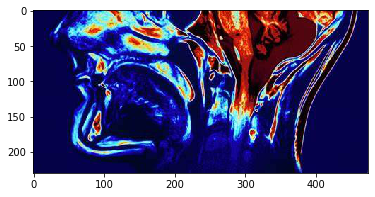

In [29]:
#displaying image after XOR of 2nd split -- 1st time
h,w,c=img2.shape
t=(h,w,c)
co=0
A=np.zeros(t,dtype=np.uint8)
for i in range(h):
    for j in range(w):
        A[i,j]=[Fresss2[co],Fresss2[co+1],Fresss2[co+2]]
        co+=3
i=Image.fromarray(A)
plt.imshow(i, interpolation='none')
plt.show()

In [30]:
#Combining 2 parts into single array

x=np.concatenate([Fresss1,Fresss2])
#x.sort()
print(x)
i222=x

[  5   1  75 ...  50  48 113]


## **Decrypted image**

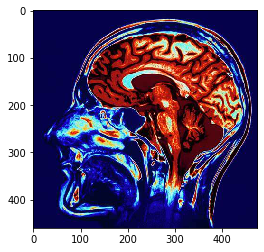

In [31]:
#converting 1d array to image 
#displaying combined image
h,w,c=img.shape
t=(h,w,c)
co=0
A=np.zeros(t,dtype=np.uint8)
for i in range(h):
    for j in range(w):
        A[i,j]=[x[co],x[co+1],x[co+2]]
        co+=3
i=Image.fromarray(A)
plt.imshow(i, interpolation='none')
plt.show()

In [32]:
import time
end_time=time.time()
print(end_time)

1668573094.9256606


# **ANALYSIS**

###**Histogram Analysis**

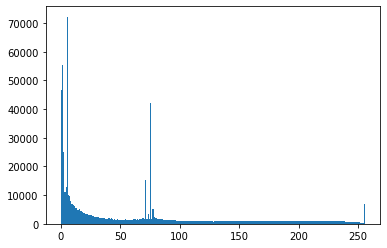

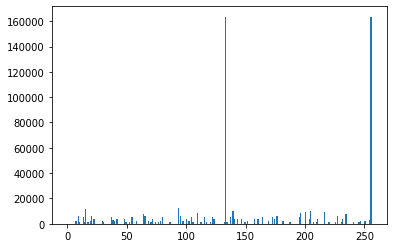

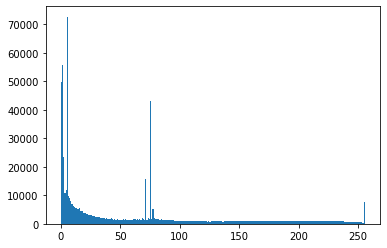

In [33]:
image = "/content/drive/MyDrive/archive (3)/Dataset/img2"
ext = ".jpg"
img = cv2.imread(image + ext,1) 
plt.hist(img.ravel(),256,[0,256])
plt.show()

plt.hist(i111.ravel(),256,[0,256])
plt.show()

plt.hist(i222.ravel(),256,[0,256])
plt.show()




## **Performance Analysis- MSE & PSNR**

In [34]:
import math
AX=OneD_img
AY=i111
AZ=i222
a=AX.size
#MSE between original image and encrypted image
ms=pow((AX-AY),2)
s=0
for i in ms:
  s+=i
mse=s/a
print("MSE (4 permutations) of encrypted image: ", mse)
#PSNR between original image and encrypted image
R=255
psnr=10*math.log10(pow(R,2)/mse)
print("PSNR (4 permutations) of encrypted image: ", psnr)


#MSE between original image and decrypted image
ms=pow((AX-AZ),2)
s=0
for i in ms:
  s+=i
mse=s/a
print("MSE (4 permutations) of decrypted image: ",mse)

#PSNR between original image and encrypted image
R=255
psnr=10*math.log10(pow(R,2)/mse)
print("PSNR(4 permutations) of decrypted image: ", psnr)




MSE (4 permutations) of encrypted image:  20511.97642481502
PSNR (4 permutations) of encrypted image:  5.010728521798612
MSE (4 permutations) of decrypted image:  0.0
PSNR(4 permutations) of decrypted image:  inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars


##**Time Analysis**

In [35]:
Total_time=end_time-start_time
print(Total_time)

16.675374507904053
